## Comparative border and non border state in the U.S. 

#### We analyze how employment, wages and population in U.S. evolved between 2010 and 2021. Also between 2016 and 2021

#### The border states are: California, Arizona, New Mexico, and Texas.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
## small trick to improve our display
## Unfortunately appears not to work in Colab.
## will allow us to see dataframes side-by-side
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [3]:
## run the display code here
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
## open data
df = pd.read_csv("data/jobs-wages-population-us-merged.csv")
df

,State,Description,Year,Value,Border
0,Alabama,Total Jobs,1998,"1,916,323.00",No
1,Alabama,Construction Jobs,1998,"150,643.00",No
2,Alabama,Manufacturing Jobs,1998,"371,319.00",No
3,Alabama,Transportation Jobs,1998,"70,796.00",No
4,Alaska,Total Jobs,1998,"285,610.00",No
...,...,...,...,...,...
11019,Washington,Population,2022,"7,785,786.00",No
11020,West Virginia,Population,2022,"1,775,156.00",No
11021,Wisconsin,Population,2022,"5,892,539.00",No
11022,Wyoming,Population,2022,"581,381.00",No


In [5]:
year = df["Year"].unique

In [6]:
dfpivot_border = pd.pivot_table(df.query("Year > 2009 & Year < 2022 & Border == 'Yes'") , values='Value', index='Year', columns='Description')
dfpivot_border

Description,Construction Jobs,Construction Wages,Manufacturing Jobs,Manufacturing Wages,Population,Total Jobs,Total Wages,Transportation Jobs,Transportation Wages
Year,,,,,,,,,
2010,"498,951.50","16,972,260.00","595,237.00","38,693,130.00","17,757,034.75","8,057,303.00","295,425,972.25","295,956.25","10,965,223.50"
2011,"500,439.50","17,387,974.00","608,329.25","40,641,068.25","17,952,306.00","8,289,066.75","312,877,036.25","307,485.75","11,667,782.25"
2012,"520,187.75","18,959,187.00","619,340.00","42,616,772.00","18,155,947.25","8,590,098.00","336,980,803.00","321,651.50","12,603,056.50"
2013,"546,117.00","20,422,330.75","627,275.25","43,033,603.50","18,347,311.75","8,875,283.00","350,203,672.00","334,216.00","13,006,478.00"
2014,"568,786.75","22,242,881.25","634,135.00","45,440,615.00","18,569,350.25","9,169,186.00","374,341,845.75","356,801.00","13,910,776.75"
2015,"591,558.25","24,589,180.25","639,546.25","47,027,680.00","18,793,864.00","9,452,195.75","398,884,174.00","408,400.50","15,134,250.75"
2016,"621,935.75","26,347,062.50","636,685.25","47,786,852.50","18,988,612.75","9,641,130.75","412,028,788.25","446,885.25","15,954,819.00"
2017,"640,622.00","28,370,440.75","640,903.25","50,437,084.00","19,149,301.25","9,852,627.25","437,025,910.50","494,168.25","17,333,587.75"
2018,"673,824.50","30,977,470.00","651,566.75","52,997,060.00","19,279,957.25","10,137,776.50","465,242,441.25","534,285.25","19,273,402.00"


In [7]:
dfpivot_nonborder = pd.pivot_table(df.query("Year > 2009 & Year < 2022 & Border == 'No'") , values='Value', index='Year', columns='Description').copy()
dfpivot_nonborder

Description,Construction Jobs,Construction Wages,Manufacturing Jobs,Manufacturing Wages,Population,Total Jobs,Total Wages,Transportation Jobs,Transportation Wages
Year,,,,,,,,,
2010,"150,510.96","4,802,270.67","215,661.10","11,672,160.98","5,267,218.31","2,524,009.85","89,687,093.08","93,335.50","3,298,685.06"
2011,"149,937.00","4,867,473.23","220,559.12","12,218,871.25","5,304,096.00","2,581,612.15","93,744,610.81","96,752.06","3,494,523.31"
2012,"152,402.79","5,072,208.10","224,161.69","12,641,957.44","5,341,061.71","2,623,111.75","98,130,254.58","99,744.52","3,675,277.06"
2013,"156,901.52","5,334,676.92","226,960.40","12,881,693.40","5,376,617.98","2,672,712.35","100,894,050.08","101,878.42","3,794,950.33"
2014,"162,050.21","5,768,349.42","229,332.06","13,413,219.31","5,412,696.73","2,732,606.67","106,213,147.23","105,900.44","4,053,918.96"
2015,"166,395.83","6,265,274.08","232,474.85","13,849,308.46","5,448,410.58","2,797,312.10","111,782,424.96","115,824.25","4,316,335.62"
2016,"174,280.10","6,704,212.69","233,724.40","13,916,917.48","5,486,235.92","2,844,331.50","115,055,586.40","123,121.94","4,423,319.25"
2017,"176,587.29","7,143,332.67","245,456.39","14,997,539.59","5,521,242.85","2,888,350.71","120,427,297.92","131,823.06","4,648,313.71"
2018,"184,082.85","7,673,232.81","239,226.88","14,976,259.33","5,551,573.29","2,947,538.56","126,211,901.90","140,990.79","4,972,762.15"


In [8]:
#Calculate percentage changes border
dfchange_border = dfpivot_border.copy()
dfchange_border['Construction Jobs'] = dfchange_border['Construction Jobs'] / dfchange_border['Construction Jobs'].iat[0] * 100 
dfchange_border['Construction Wages'] = dfchange_border['Construction Wages'] / dfchange_border['Construction Wages'].iat[0] * 100
dfchange_border["Manufacturing Jobs"] = dfchange_border["Manufacturing Jobs"] / dfchange_border["Manufacturing Jobs"].iat[0] * 100
dfchange_border["Manufacturing Wages"] = dfchange_border["Manufacturing Wages"] / dfchange_border["Manufacturing Wages"].iat[0] * 100
dfchange_border["Transportation Jobs"]= dfchange_border["Transportation Jobs"] / dfchange_border["Transportation Jobs"].iat[0] * 100
dfchange_border["Transportation Wages"] = dfchange_border["Transportation Wages"] / dfchange_border["Transportation Wages"].iat[0] * 100
dfchange_border["Population"] = dfchange_border["Population"] / dfchange_border["Population"].iat[0] * 100
dfchange_border["Total Jobs"] = dfchange_border["Total Jobs"] / dfchange_border["Total Jobs"].iat[0] * 100 
dfchange_border["Total Wages"]  = dfchange_border["Total Wages"] / dfchange_border["Total Wages"].iat[0] * 100
dfchange_border["Year"] = dfchange_border.index

In [9]:
dfchange_border

Description,Construction Jobs,Construction Wages,Manufacturing Jobs,Manufacturing Wages,Population,Total Jobs,Total Wages,Transportation Jobs,Transportation Wages,Year
Year,,,,,,,,,,
2010,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,2010
2011,100.30,102.45,102.20,105.03,101.10,102.88,105.91,103.90,106.41,2011
2012,104.26,111.71,104.05,110.14,102.25,106.61,114.07,108.68,114.94,2012
2013,109.45,120.33,105.38,111.22,103.32,110.15,118.54,112.93,118.62,2013
2014,114.00,131.05,106.53,117.44,104.57,113.80,126.71,120.56,126.86,2014
2015,118.56,144.88,107.44,121.54,105.84,117.31,135.02,137.99,138.02,2015
2016,124.65,155.24,106.96,123.50,106.94,119.66,139.47,151.00,145.50,2016
2017,128.39,167.16,107.67,130.35,107.84,122.28,147.93,166.97,158.08,2017
2018,135.05,182.52,109.46,136.97,108.58,125.82,157.48,180.53,175.77,2018


In [10]:
#Calculate percentage changes non border
dfchange_nonborder = dfpivot_nonborder.copy()
dfchange_nonborder['Construction Jobs'] = dfchange_nonborder['Construction Jobs'] / dfchange_nonborder['Construction Jobs'].iat[0] * 100 
dfchange_nonborder['Construction Wages'] = dfchange_nonborder['Construction Wages'] / dfchange_nonborder['Construction Wages'].iat[0] * 100
dfchange_nonborder["Manufacturing Jobs"] = dfchange_nonborder["Manufacturing Jobs"] / dfchange_nonborder["Manufacturing Jobs"].iat[0] * 100
dfchange_nonborder["Manufacturing Wages"] = dfchange_nonborder["Manufacturing Wages"] / dfchange_nonborder["Manufacturing Wages"].iat[0] * 100
dfchange_nonborder["Transportation Jobs"]= dfchange_nonborder["Transportation Jobs"] / dfchange_nonborder["Transportation Jobs"].iat[0] * 100
dfchange_nonborder["Transportation Wages"] = dfchange_nonborder["Transportation Wages"] / dfchange_nonborder["Transportation Wages"].iat[0] * 100
dfchange_nonborder["Population"] = dfchange_nonborder["Population"] / dfchange_nonborder["Population"].iat[0] * 100
dfchange_nonborder["Total Jobs"] = dfchange_nonborder["Total Jobs"] / dfchange_nonborder["Total Jobs"].iat[0] * 100 
dfchange_nonborder["Total Wages"]  = dfchange_nonborder["Total Wages"] / dfchange_nonborder["Total Wages"].iat[0] * 100
dfchange_nonborder["Year"] = dfchange_nonborder.index

In [11]:
dfchange_nonborder

Description,Construction Jobs,Construction Wages,Manufacturing Jobs,Manufacturing Wages,Population,Total Jobs,Total Wages,Transportation Jobs,Transportation Wages,Year
Year,,,,,,,,,,
2010,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,2010
2011,99.62,101.36,102.27,104.68,100.70,102.28,104.52,103.66,105.94,2011
2012,101.26,105.62,103.94,108.31,101.40,103.93,109.41,106.87,111.42,2012
2013,104.25,111.09,105.24,110.36,102.08,105.89,112.50,109.15,115.04,2013
2014,107.67,120.12,106.34,114.92,102.76,108.26,118.43,113.46,122.89,2014
2015,110.55,130.46,107.80,118.65,103.44,110.83,124.64,124.09,130.85,2015
2016,115.79,139.61,108.38,119.23,104.16,112.69,128.29,131.91,134.09,2016
2017,117.33,148.75,113.82,128.49,104.82,114.44,134.27,141.24,140.91,2017
2018,122.31,159.78,110.93,128.31,105.40,116.78,140.72,151.06,150.75,2018


In [63]:
#Just jobs border and non border
dfjobschangeborder = dfchange_border[["Total Jobs", "Population"]]-100
dfjobschangeborder.rename(columns = {
                            "Total Jobs": "Total Jobs border", 
                            "Population": "Population border" 
                           }, inplace = True)

In [64]:
dfjobschangeborder.reset_index()

Description,Year,Total Jobs border,Population border
0,2010,0.00,0.00
1,2011,2.88,1.10
2,2012,6.61,2.25
3,2013,10.15,3.32
4,2014,13.80,4.57
5,2015,17.31,5.84
6,2016,19.66,6.94
7,2017,22.28,7.84
8,2018,25.82,8.58
9,2019,27.28,9.23


In [65]:
#Just jobs border and non border
dfjobschangenonborder = dfchange_nonborder[["Total Jobs", "Population"]]-100
dfjobschangenonborder.rename(columns = {
                            "Total Jobs": "Total Jobs non border", 
                            "Population": "Population non border" 
                           }, inplace = True)

In [66]:
dfjobschangenonborder.reset_index()

Description,Year,Total Jobs non border,Population non border
0,2010,0.00,0.00
1,2011,2.28,0.70
2,2012,3.93,1.40
3,2013,5.89,2.08
4,2014,8.26,2.76
5,2015,10.83,3.44
6,2016,12.69,4.16
7,2017,14.44,4.82
8,2018,16.78,5.40
9,2019,17.36,5.90


In [76]:
dfjobschange = pd.merge(dfjobschangeborder,dfjobschangenonborder,left_on="Year", right_on="Year")

In [79]:
dfjobschange.reset_index()
dfjobschange["Year"] = dfjobschange.index


In [80]:
#Export to CSV
dfjobschange.to_csv("data/us-jobs-change.csv", index = False, encoding = "UTF8")


### Jobs

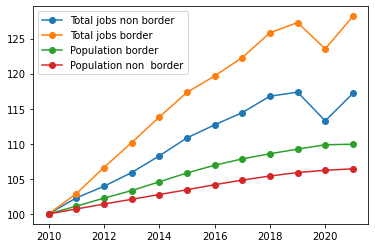

In [19]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Total Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Total Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total jobs non border")
ax.plot(x2, y2, marker = "o", label = "Total jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

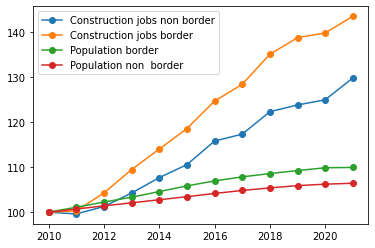

In [20]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Construction Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Construction Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction jobs non border")
ax.plot(x2, y2, marker = "o", label = "Construction jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

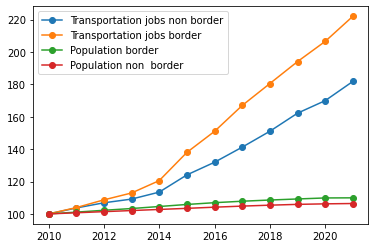

In [21]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Transportation Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Transportation Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation jobs non border")
ax.plot(x2, y2, marker = "o", label = "Transportation jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

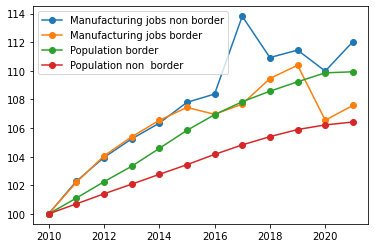

In [22]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Manufacturing Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Manufacturing Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing jobs non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

### Wages

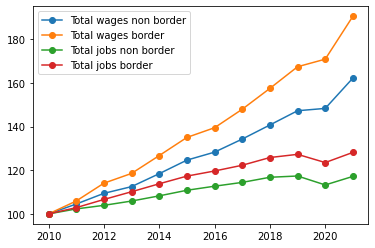

In [23]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Total Wages"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Total Wages"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Total Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total wages non border")
ax.plot(x2, y2, marker = "o", label = "Total wages border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

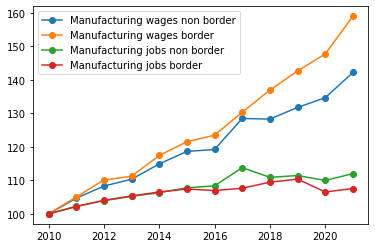

In [24]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Manufacturing Wages"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Manufacturing Wages"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Manufacturing Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Manufacturing Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing wages non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing wages border")
ax.plot(x3, y3, marker = "o", label = "Manufacturing jobs non border")
ax.plot(x4, y4, marker = "o", label = "Manufacturing jobs border")

ax.legend()

# plt.show()

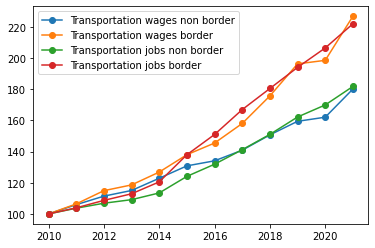

In [25]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Transportation Wages"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Transportation Wages"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Transportation Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Transportation Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation wages non border")
ax.plot(x2, y2, marker = "o", label = "Transportation wages border")
ax.plot(x3, y3, marker = "o", label = "Transportation jobs non border")
ax.plot(x4, y4, marker = "o", label = "Transportation jobs border")

ax.legend()

# plt.show()

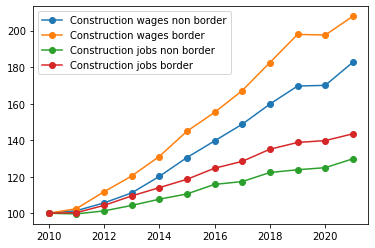

In [26]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Construction Wages"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Construction Wages"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Construction Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Construction Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction wages non border")
ax.plot(x2, y2, marker = "o", label = "Construction wages border")
ax.plot(x3, y3, marker = "o", label = "Construction jobs non border")
ax.plot(x4, y4, marker = "o", label = "Construction jobs border")

ax.legend()

# plt.show()

### Post 2015

In [27]:
dfchange_border1621 = dfpivot_border.query("Year > 2015")
dfchange_border1621

Description,Construction Jobs,Construction Wages,Manufacturing Jobs,Manufacturing Wages,Population,Total Jobs,Total Wages,Transportation Jobs,Transportation Wages
Year,,,,,,,,,
2016,"621,935.75","26,347,062.50","636,685.25","47,786,852.50","18,988,612.75","9,641,130.75","412,028,788.25","446,885.25","15,954,819.00"
2017,"640,622.00","28,370,440.75","640,903.25","50,437,084.00","19,149,301.25","9,852,627.25","437,025,910.50","494,168.25","17,333,587.75"
2018,"673,824.50","30,977,470.00","651,566.75","52,997,060.00","19,279,957.25","10,137,776.50","465,242,441.25","534,285.25","19,273,402.00"
2019,"692,274.75","33,595,671.00","657,090.50","55,200,076.50","19,396,601.75","10,255,138.25","494,530,851.50","574,406.00","21,529,791.00"
2020,"697,437.00","33,533,533.00","634,209.50","57,175,475.50","19,508,115.00","9,952,359.25","504,768,215.75","611,338.50","21,777,748.75"
2021,"715,934.00","35,281,876.00","640,377.75","61,524,408.50","19,520,852.25","10,327,592.75","562,837,695.75","657,226.00","24,882,287.25"


In [28]:
#Calculate percentage changes border
dfchange_border1621['Construction Jobs'] = dfchange_border1621['Construction Jobs'] / dfchange_border1621['Construction Jobs'].iat[0] * 100 
dfchange_border1621['Construction Wages'] = dfchange_border1621['Construction Wages'] / dfchange_border1621['Construction Wages'].iat[0] * 100
dfchange_border1621["Manufacturing Jobs"] = dfchange_border1621["Manufacturing Jobs"] / dfchange_border1621["Manufacturing Jobs"].iat[0] * 100
dfchange_border1621["Manufacturing Wages"] = dfchange_border1621["Manufacturing Wages"] / dfchange_border1621["Manufacturing Wages"].iat[0] * 100
dfchange_border1621["Transportation Jobs"]= dfchange_border1621["Transportation Jobs"] / dfchange_border1621["Transportation Jobs"].iat[0] * 100
dfchange_border1621["Transportation Wages"] = dfchange_border1621["Transportation Wages"] / dfchange_border1621["Transportation Wages"].iat[0] * 100
dfchange_border1621["Population"] = dfchange_border1621["Population"] / dfchange_border1621["Population"].iat[0] * 100
dfchange_border1621["Total Jobs"] = dfchange_border1621["Total Jobs"] / dfchange_border1621["Total Jobs"].iat[0] * 100 
dfchange_border1621["Total Wages"]  = dfchange_border1621["Total Wages"] / dfchange_border1621["Total Wages"].iat[0] * 100
dfchange_border1621["Year"] = dfchange_border1621.index

<ipython-input-28-f972c61ec5bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchange_border1621['Construction Jobs'] = dfchange_border1621['Construction Jobs'] / dfchange_border1621['Construction Jobs'].iat[0] * 100
<ipython-input-28-f972c61ec5bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchange_border1621['Construction Wages'] = dfchange_border1621['Construction Wages'] / dfchange_border1621['Construction Wages'].iat[0] * 100
<ipython-input-28-f972c61ec5bf>:4: SettingWithCopyWarning: 
A value

In [29]:
#Calculate percentage changes border
dfchange_nonborder1621 = dfpivot_nonborder.query("Year > 2015")
dfchange_nonborder1621['Construction Jobs'] = dfchange_nonborder1621['Construction Jobs'] / dfchange_nonborder1621['Construction Jobs'].iat[0] * 100 
dfchange_nonborder1621['Construction Wages'] = dfchange_nonborder1621['Construction Wages'] / dfchange_nonborder1621['Construction Wages'].iat[0] * 100
dfchange_nonborder1621["Manufacturing Jobs"] = dfchange_nonborder1621["Manufacturing Jobs"] / dfchange_nonborder1621["Manufacturing Jobs"].iat[0] * 100
dfchange_nonborder1621["Manufacturing Wages"] = dfchange_nonborder1621["Manufacturing Wages"] / dfchange_nonborder1621["Manufacturing Wages"].iat[0] * 100
dfchange_nonborder1621["Transportation Jobs"]= dfchange_nonborder1621["Transportation Jobs"] / dfchange_nonborder1621["Transportation Jobs"].iat[0] * 100
dfchange_nonborder1621["Transportation Wages"] = dfchange_nonborder1621["Transportation Wages"] / dfchange_nonborder1621["Transportation Wages"].iat[0] * 100
dfchange_nonborder1621["Population"] = dfchange_nonborder1621["Population"] / dfchange_nonborder1621["Population"].iat[0] * 100
dfchange_nonborder1621["Total Jobs"] = dfchange_nonborder1621["Total Jobs"] / dfchange_nonborder1621["Total Jobs"].iat[0] * 100 
dfchange_nonborder1621["Total Wages"]  = dfchange_nonborder1621["Total Wages"] / dfchange_nonborder1621["Total Wages"].iat[0] * 100
dfchange_nonborder1621["Year"] = dfchange_nonborder1621.index

<ipython-input-29-6c1f3c00c3b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchange_nonborder1621['Construction Jobs'] = dfchange_nonborder1621['Construction Jobs'] / dfchange_nonborder1621['Construction Jobs'].iat[0] * 100
<ipython-input-29-6c1f3c00c3b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchange_nonborder1621['Construction Wages'] = dfchange_nonborder1621['Construction Wages'] / dfchange_nonborder1621['Construction Wages'].iat[0] * 100
<ipython-input-29-6c1f3c00c3b6>:5: SettingWithCop

In [30]:
dfchange_nonborder1621

Description,Construction Jobs,Construction Wages,Manufacturing Jobs,Manufacturing Wages,Population,Total Jobs,Total Wages,Transportation Jobs,Transportation Wages,Year
Year,,,,,,,,,,
2016,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,2016
2017,101.32,106.55,105.02,107.76,100.64,101.55,104.67,107.07,105.09,2017
2018,105.62,114.45,102.35,107.61,101.19,103.63,109.70,114.51,112.42,2018
2019,106.92,121.53,102.84,110.53,101.67,104.14,114.78,122.98,118.92,2019
2020,107.90,121.79,101.48,112.97,101.98,100.51,115.61,128.85,120.89,2020
2021,112.11,130.88,103.38,119.28,102.18,103.99,126.44,137.85,134.37,2021


## Jobs

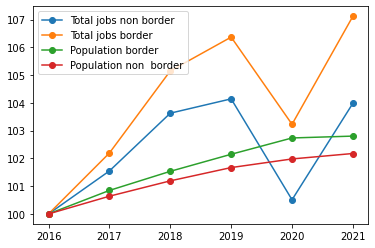

In [31]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Total Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Total Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total jobs non border")
ax.plot(x2, y2, marker = "o", label = "Total jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

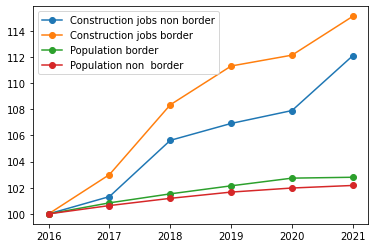

In [32]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Construction Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Construction Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction jobs non border")
ax.plot(x2, y2, marker = "o", label = "Construction jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

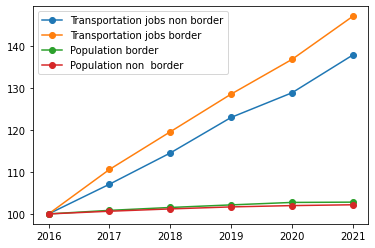

In [33]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Transportation Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Transportation Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation jobs non border")
ax.plot(x2, y2, marker = "o", label = "Transportation jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

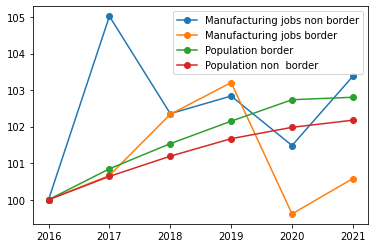

In [34]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Manufacturing Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Manufacturing Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing jobs non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

### Wages

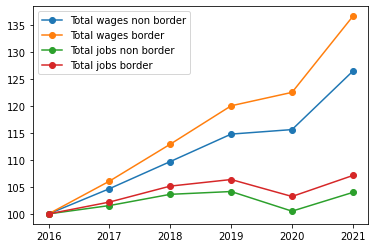

In [35]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Total Wages"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Total Wages"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total wages non border")
ax.plot(x2, y2, marker = "o", label = "Total wages border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

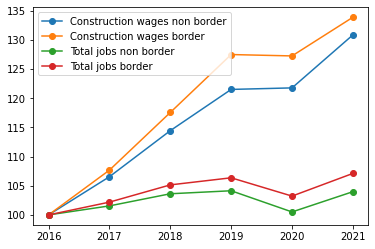

In [36]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Construction Wages"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Construction Wages"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction wages non border")
ax.plot(x2, y2, marker = "o", label = "Construction wages border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

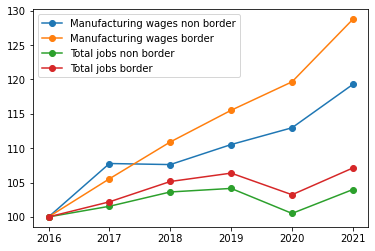

In [37]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Manufacturing Wages"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Manufacturing Wages"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing wages non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing wages border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

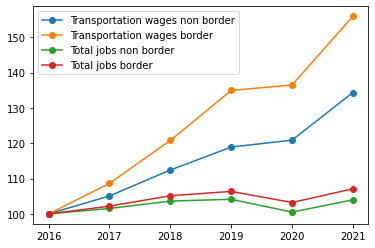

In [38]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Transportation Wages"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Transportation Wages"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation wages non border")
ax.plot(x2, y2, marker = "o", label = "Transportation wages border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

In [39]:
#Summary

In [40]:
dftotal = pd.pivot_table(df.query("Year > 2006 & Year < 2022") , values='Value', index='Year', columns=['Description',"Border"])
dftotal

Description Construction Jobs            Construction Wages                \
Border                     No        Yes                 No           Yes   
Year                                                                        
2007               194,360.15 656,378.75       6,148,876.27 22,837,139.00   
2008               183,760.81 619,735.75       6,069,673.00 22,416,502.50   
2009               161,480.21 537,370.50       5,145,935.42 18,516,358.00   
2010               150,510.96 498,951.50       4,802,270.67 16,972,260.00   
2011               149,937.00 500,439.50       4,867,473.23 17,387,974.00   
2012               152,402.79 520,187.75       5,072,208.10 18,959,187.00   
2013               156,901.52 546,117.00       5,334,676.92 20,422,330.75   
2014               162,050.21 568,786.75       5,768,349.42 22,242,881.25   
2015               166,395.83 591,558.25       6,265,274.08 24,589,180.25   
2016               174,280.10 621,935.75       6,704,212.69 26,347,062.50   
2017               176,587.29 640,622.00       7,143,332.67 28,370,440.75   
2018               184,082.85 673,824.50       7,673,232.81 30,977,470.00   
2019               186,336.19 692,274.75       8,147,654.50 33,595,671.00   
2020               188,056.15 697,437.00       8,165,174.40 33,533,533.00   
2021               195,379.27 715,934.00       8,774,651.27 35,281,876.00   

Description Manufacturing Jobs            Manufacturing Wages                \
Border                      No        Yes                  No           Yes   
Year                                                                          
2007                259,036.38 692,913.00       13,108,746.62 41,772,131.00   
2008                249,828.73 675,778.25       12,921,978.04 41,007,875.25   
2009                222,151.02 618,739.00       11,445,077.40 37,830,752.25   
2010                215,661.10 595,237.00       11,672,160.98 38,693,130.00   
2011                220,559.12 608,329.25       12,218,871.25 40,641,068.25   
2012                224,161.69 619,340.00       12,641,957.44 42,616,772.00   
2013                226,960.40 627,275.25       12,881,693.40 43,033,603.50   
2014                229,332.06 634,135.00       13,413,219.31 45,440,615.00   
2015                232,474.85 639,546.25       13,849,308.46 47,027,680.00   
2016                233,724.40 636,685.25       13,916,917.48 47,786,852.50   
2017                245,456.39 640,903.25       14,997,539.59 50,437,084.00   
2018                239,226.88 651,566.75       14,976,259.33 52,997,060.00   
2019                240,353.21 657,090.50       15,381,870.58 55,200,076.50   
2020                237,190.52 634,209.50       15,721,311.78 57,175,475.50   
2021                241,621.76 640,377.75       16,599,712.37 61,524,408.50   

Description   Population                 Total Jobs                \
Border                No           Yes           No           Yes   
Year                                                                
2007        5,151,465.98 17,060,011.25 2,647,171.77  8,413,180.00   
2008        5,192,285.02 17,301,100.00 2,634,047.08  8,405,963.00   
2009        5,229,836.62 17,535,736.50 2,536,663.73  8,100,574.50   
2010        5,267,218.31 17,757,034.75 2,524,009.85  8,057,303.00   
2011        5,304,096.00 17,952,306.00 2,581,612.15  8,289,066.75   
2012        5,341,061.71 18,155,947.25 2,623,111.75  8,590,098.00   
2013        5,376,617.98 18,347,311.75 2,672,712.35  8,875,283.00   
2014        5,412,696.73 18,569,350.25 2,732,606.67  9,169,186.00   
2015        5,448,410.58 18,793,864.00 2,797,312.10  9,452,195.75   
2016        5,486,235.92 18,988,612.75 2,844,331.50  9,641,130.75   
2017        5,521,242.85 19,149,301.25 2,888,350.71  9,852,627.25   
2018        5,551,573.29 19,279,957.25 2,947,538.56 10,137,776.50   
2019        5,577,836.56 19,396,601.75 2,962,208.23 10,255,138.25   
2020        5,594,865.10 19,508,115.00 2,858,828.65  9,952,359.25   
2021        5,605

In [41]:
descriptions = df["Description"].unique()
descriptions

array(['Total Jobs', 'Construction Jobs', 'Manufacturing Jobs',
       'Transportation Jobs', 'Total Wages', 'Construction Wages',
       'Manufacturing Wages', 'Transportation Wages', 'Population'],
      dtype=object)

In [42]:
dftotalchange = dftotal.copy()
for i in descriptions:
    for j in ["Yes", "No"]:
        dftotalchange[(i,j)] = dftotal[(i,j)] / dftotal[(i,j)].iat[0] * 100 -100

In [43]:
dftotalchange["Year"] = dftotalchange.index
dftotalchange

Description Construction Jobs        Construction Wages         \
Border                     No    Yes                 No    Yes   
Year                                                             
2007                     0.00   0.00               0.00   0.00   
2008                    -5.45  -5.58              -1.29  -1.84   
2009                   -16.92 -18.13             -16.31 -18.92   
2010                   -22.56 -23.98             -21.90 -25.68   
2011                   -22.86 -23.76             -20.84 -23.86   
2012                   -21.59 -20.75             -17.51 -16.98   
2013                   -19.27 -16.80             -13.24 -10.57   
2014                   -16.62 -13.34              -6.19  -2.60   
2015                   -14.39  -9.88               1.89   7.67   
2016                   -10.33  -5.25               9.03  15.37   
2017                    -9.14  -2.40              16.17  24.23   
2018                    -5.29   2.66              24.79  35.65   
2019                    -4.13   5.47              32.51  47.11   
2020                    -3.24   6.26              32.79  46.84   
2021                     0.52   9.07              42.70  54.49   

Description Manufacturing Jobs        Manufacturing Wages       Population  \
Border                      No    Yes                  No   Yes         No   
Year                                                                         
2007                      0.00   0.00                0.00  0.00       0.00   
2008                     -3.55  -2.47               -1.42 -1.83       0.79   
2009                    -14.24 -10.70              -12.69 -9.44       1.52   
2010                    -16.74 -14.10              -10.96 -7.37       2.25   
2011                    -14.85 -12.21               -6.79 -2.71       2.96   
2012                    -13.46 -10.62               -3.56  2.02       3.68   
2013                    -12.38  -9.47               -1.73  3.02       4.37   
2014                    -11.47  -8.48                2.32  8.78       5.07   
2015                    -10.25  -7.70                5.65 12.58       5.76   
2016                     -9.77  -8.11                6.17 14.40       6.50   
2017                     -5.24  -7.51               14.41 20.74       7.18   
2018                     -7.65  -5.97               14.25 26.87       7.77   
2019                     -7.21  -5.17               17.34 32.15       8.28   
2020                     -8.43  -8.47               19.93 36.87       8.61   
2021                     -6.72  -7.58               26.63 47.29       8.82   

Description       Total Jobs       Total Wages       Transportation Jobs  \
Border        Yes         No   Yes          No   Yes                  No   
Year                                                                       
2007         0.00       0.00  0.00        0.00  0.00                0.00   
2008         1.41      -0.50 -0.09        1.57  1.69               -1.97   
2009         2.79      -4.17 -3.72       -4.37 -4.49               -6.88   
2010         4.09      -4.65 -4.23       -2.34 -2.25               -7.98   
2011         5.23      -2.48 -1.48        2.08  3.52               -4.61   
2012         6.42      -0.91  2.10        6.85 11.49               -1.66   
2013         7.55       0.96  5.49        9.86 15.87                0.44   
2014         8.85       3.23  8.99       15.65 23.86                4.41   
2015        10.16       5.67 12.35       21.72 31.98               14.19   
2016        11.30       7.45 14.60       25.28 36.33               21.39   
2017        12.25       9.11 17.11       31.13 44.60               29.97   
2018        13.01      11.35 20.50       37.43 53.93               39.00   
2019        13.70      11.90 21.89       43.80 63.62               49.28   
2020        14.35       8.00 18.29       44.84 67.01               56.40   
2021        14.42      11.73 22.75       58.41 86.22               67.33   

Description        Transportation Wag

In [44]:
dftotalchange_melted = pd.melt(dftotalchange, id_vars=["Year"]).copy()
dftotalchange_melted.rename(columns = {"value": "Change"}, inplace = True)
dftotalchange_melted

,Year,Description,Border,Change
0,2007,Construction Jobs,No,0.00
1,2008,Construction Jobs,No,-5.45
2,2009,Construction Jobs,No,-16.92
3,2010,Construction Jobs,No,-22.56
4,2011,Construction Jobs,No,-22.86
...,...,...,...,...
265,2017,Transportation Wages,Yes,52.64
266,2018,Transportation Wages,Yes,69.72
267,2019,Transportation Wages,Yes,89.59
268,2020,Transportation Wages,Yes,91.78


In [45]:
dfsummary = pd.pivot_table(dftotalchange_melted.query("Year == 2021") , values='Change', index='Description', columns='Border')
dfsummary

Border,No,Yes
Description,,
Construction Jobs,0.52,9.07
Construction Wages,42.70,54.49
Manufacturing Jobs,-6.72,-7.58
Manufacturing Wages,26.63,47.29
Population,8.82,14.42
Total Jobs,11.73,22.75
Total Wages,58.41,86.22
Transportation Jobs,67.33,106.66
Transportation Wages,71.14,119.12


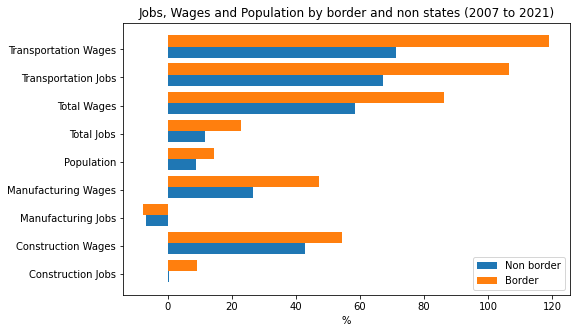

In [46]:
import matplotlib.pyplot as plt

# Datos de las series
serie1 = dfsummary['No']
serie2 = dfsummary['Yes']

# Crear los índices para las barras
ind = np.arange(len(dfsummary['No']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary['No'], height=0.4, align='center', label='Non border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary['Yes'], height=0.4, align='edge', label='Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Jobs, Wages and Population by border and non states (2007 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary.index)

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

### Conclusions
For the period 2007 to 2021, the southern border had better economic performance than the rest of the country. This is a period that coincides with the beginning of long-term reshoring and nearshoring (and does not consider the drop in activity due to the 2008 crisis).

There was a higher increase in both employment (23%) and the wage bill (86%) in the border states than in the non-border states (12% employment and 58% wages).

There were sectors where this was more pronounced. In transportation and warehousing, employment increased 107% and wages 120% in the border states. In the non-border states, employment increased by 67% and wages by 71%.

In construction, employment on the border increased by 9% and wages by 54%, while in non-border areas employment did not vary (in the total period) and the wage bill increased by 43%. It is worth clarifying that the comparison with 2007 includes a slump due to the crisis and a rapid recovery thereafter.

In manufacturing, there was an 8% drop in employment at the border and a 47% increase in wages. Non-border employment also fell, by 7%, and wages rose less, by 27%.

Relative to population, total employment on the border grew considerably faster. In the non-border states, it also increased, but at a slightly higher rate than population growth.

Construction grew less than the population in the total period but included a sharp drop starting in 2008.

Transportation jobs skyrocketed more than the population, both on and off the border. But faster at the border.

Manufacturing employment grew less than the population in both cases. Includes a 2008 collapse.

Total wages (the sum) grew faster than employment nationally but at a higher rate at the border. This means that the average wage also grew.

This was repeated in all sectors analyzed. 

Transportation saw an increase almost equal. So there was no increase in the average wage.


### Post 2015

In [47]:
dftotalchange1621 = dftotal.copy()
for i in descriptions:
    for j in ["Yes", "No"]:
        dftotalchange1621[(i,j)] = dftotal[(i,j)] / dftotal[(i,j)].iat[0] * 100 -100
        

In [48]:
dftotalchange1621["Year"] = dftotalchange1621.index
dftotalchange1621

Description Construction Jobs        Construction Wages         \
Border                     No    Yes                 No    Yes   
Year                                                             
2007                     0.00   0.00               0.00   0.00   
2008                    -5.45  -5.58              -1.29  -1.84   
2009                   -16.92 -18.13             -16.31 -18.92   
2010                   -22.56 -23.98             -21.90 -25.68   
2011                   -22.86 -23.76             -20.84 -23.86   
2012                   -21.59 -20.75             -17.51 -16.98   
2013                   -19.27 -16.80             -13.24 -10.57   
2014                   -16.62 -13.34              -6.19  -2.60   
2015                   -14.39  -9.88               1.89   7.67   
2016                   -10.33  -5.25               9.03  15.37   
2017                    -9.14  -2.40              16.17  24.23   
2018                    -5.29   2.66              24.79  35.65   
2019                    -4.13   5.47              32.51  47.11   
2020                    -3.24   6.26              32.79  46.84   
2021                     0.52   9.07              42.70  54.49   

Description Manufacturing Jobs        Manufacturing Wages       Population  \
Border                      No    Yes                  No   Yes         No   
Year                                                                         
2007                      0.00   0.00                0.00  0.00       0.00   
2008                     -3.55  -2.47               -1.42 -1.83       0.79   
2009                    -14.24 -10.70              -12.69 -9.44       1.52   
2010                    -16.74 -14.10              -10.96 -7.37       2.25   
2011                    -14.85 -12.21               -6.79 -2.71       2.96   
2012                    -13.46 -10.62               -3.56  2.02       3.68   
2013                    -12.38  -9.47               -1.73  3.02       4.37   
2014                    -11.47  -8.48                2.32  8.78       5.07   
2015                    -10.25  -7.70                5.65 12.58       5.76   
2016                     -9.77  -8.11                6.17 14.40       6.50   
2017                     -5.24  -7.51               14.41 20.74       7.18   
2018                     -7.65  -5.97               14.25 26.87       7.77   
2019                     -7.21  -5.17               17.34 32.15       8.28   
2020                     -8.43  -8.47               19.93 36.87       8.61   
2021                     -6.72  -7.58               26.63 47.29       8.82   

Description       Total Jobs       Total Wages       Transportation Jobs  \
Border        Yes         No   Yes          No   Yes                  No   
Year                                                                       
2007         0.00       0.00  0.00        0.00  0.00                0.00   
2008         1.41      -0.50 -0.09        1.57  1.69               -1.97   
2009         2.79      -4.17 -3.72       -4.37 -4.49               -6.88   
2010         4.09      -4.65 -4.23       -2.34 -2.25               -7.98   
2011         5.23      -2.48 -1.48        2.08  3.52               -4.61   
2012         6.42      -0.91  2.10        6.85 11.49               -1.66   
2013         7.55       0.96  5.49        9.86 15.87                0.44   
2014         8.85       3.23  8.99       15.65 23.86                4.41   
2015        10.16       5.67 12.35       21.72 31.98               14.19   
2016        11.30       7.45 14.60       25.28 36.33               21.39   
2017        12.25       9.11 17.11       31.13 44.60               29.97   
2018        13.01      11.35 20.50       37.43 53.93               39.00   
2019        13.70      11.90 21.89       43.80 63.62               49.28   
2020        14.35       8.00 18.29       44.84 67.01               56.40   
2021        14.42      11.73 22.75       58.41 86.22               67.33   

Description        Transportation Wag

In [49]:
dftotalchange1621_melted = pd.melt(dftotalchange1621, id_vars=["Year"]).copy()
dftotalchange1621_melted.rename(columns = {"value": "Change"}, inplace = True)
dftotalchange1621_melted

,Year,Description,Border,Change
0,2007,Construction Jobs,No,0.00
1,2008,Construction Jobs,No,-5.45
2,2009,Construction Jobs,No,-16.92
3,2010,Construction Jobs,No,-22.56
4,2011,Construction Jobs,No,-22.86
...,...,...,...,...
265,2017,Transportation Wages,Yes,52.64
266,2018,Transportation Wages,Yes,69.72
267,2019,Transportation Wages,Yes,89.59
268,2020,Transportation Wages,Yes,91.78


In [50]:
dfsummary1621 = pd.pivot_table(dftotalchange1621_melted.query("Year == 2021") , values='Change', index='Description', columns='Border')
dfsummary1621

Border,No,Yes
Description,,
Construction Jobs,0.52,9.07
Construction Wages,42.70,54.49
Manufacturing Jobs,-6.72,-7.58
Manufacturing Wages,26.63,47.29
Population,8.82,14.42
Total Jobs,11.73,22.75
Total Wages,58.41,86.22
Transportation Jobs,67.33,106.66
Transportation Wages,71.14,119.12


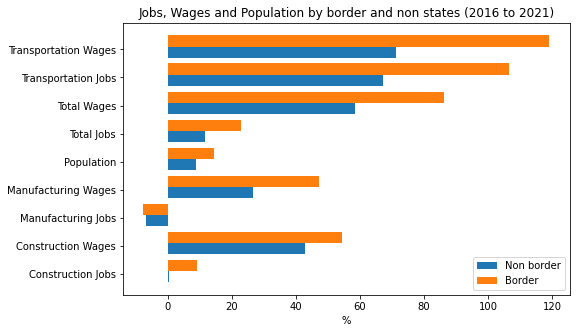

In [51]:
import matplotlib.pyplot as plt

# Datos de las series
serie1 = dfsummary1621['No']
serie2 = dfsummary1621['Yes']

# Crear los índices para las barras
ind = np.arange(len(dfsummary['No']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary1621['No'], height=0.4, align='center', label='Non border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary1621['Yes'], height=0.4, align='edge', label='Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Jobs, Wages and Population by border and non states (2016 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary1621.index)

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

### Conclusions
For the period 2016 to 2021, there was also better economic performance in the south than in the rest of the country. This is a period of increasing tension between China and the America. It is expected that nearshoring and reshoring will accelerate thereafter.

Employment (7%) and wages  (37%) increased more in the border states than outside the border states (4% employment and 26% wages).

There were sectors where this was more pronounced. In transportation and warehousing, employment increased by 47% and wages by 56% on the border. In non-border states, employment increased by 38% and wages by 34%.

In construction, border employment increased by 15% and wages by 34%. In non-border states, employment increased by 12% (in the total period) and wages rose by 30%.

Manufacturing employment outside the border increased faster (3%) but wages did not (19%). At the border, employment increased by less than 1% and wages by 29%.

Total wages (the sum) grew faster than employment than the population both on and off the border. This means that the average wage has increased. Border states registered more significant increases than non-border states.

Border states' jobs grew faster than the population. In the non-border states, workers increased as well, but slightly faster than population growth. This includes the sharp drop due to the pandemic.

Construction jobs rise more than the population, both on and off the border. Border states grew faster.

Something similar happened in transportation but on a significantly larger scale.

Manufacturing employment was uneven. Compared to the population, it grew less on the border, whereas it grew similarly in non-border states. 